# Прогноз оттока клиентов

Отток клиентов
Это когда существующий клиент, пользователь, подписчик или любой другой клиент перестает вести бизнес или прекращает отношения с компанией.

Типы оттока клиентов:

    Контрактный отток - клиент находится под контрактом на услугу и решает отменить услугу, например, кабельное телевидение.
    
    Добровольный отток - когда пользователь добровольно отменяет услугу, например, сотовую связь.
    
    Неконтрактный отток - когда клиент не имеет контракта на услугу и решает отменить услугу, например, лояльность потребителей в розничных магазинах.
    
    Непроизвольный отток - когда отток происходит без какого-либо запроса клиента, например, истечение срока действия кредитной карты.

Причины добровольного оттока

- Отсутствие использования
- Плохое обслуживание
- Лучшая цена

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Оператор предоставляет два основных типа услуг:**

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

# План

**1. Знакомство с данными**

    1.1 Импорт библиотек
    
    1.2 Загрузка данных
    
    1.3 Исследовательский анализ данных (размер, признаки, строки, типы данных, пропуски, аномалии, дубликаты, кореляция, распределение)
    
 **2. Предобработка данных**
    
    2.1 Преобразование типов данных 
    
    2.2 Разбиение на выборки
    
    2.3 Нормализация значений
    
 **3. Обучение моделей**
 
 
 **4. Вывод**

**************

## Знакомство с данными

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from catboost.utils import eval_metric
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

**************

### Загрузка данных

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')

In [3]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')

In [5]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')

In [7]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [8]:
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [9]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Загружены 4 дата сета 
- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Для анализа данных объеденим 4 датасета в один по 'customerID' сохраняя все столбцы

In [10]:
df = df_contract.merge(df_personal, 'outer', on = 'customerID').merge(df_internet, 'outer', on = 'customerID').merge(df_phone, 'outer', on = 'customerID')

In [11]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


**************

### Исследовательский анализ данных

#### Общая информация

In [12]:
df.shape

(7043, 20)

Датасет состоит из 20 столбцов и 7043 строк

Названия столбцов состоят из строчных и прописных букв. Т.к. к ним обращаться будем часто, для единообразия всех данных  приведем все буквы к строчным и добавим нижнее подчеркивание для разделения слов.

In [13]:
df.columns = df.columns.str.lower()

In [14]:
df.columns = ['customer_id', 'begin_date', 'end_date', 'type', 'paper_less_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines']

**Отображено 5 первых строк датасета.**

Столбцы датасета df:

'customer_id' - ID клиента

'begin_date' - дата начала обслуживания

'end_date' - дата окончания обслуживания

'payment_type' - типы платежей - ежемесячно, раз в год

'paper_less_billing' - безналичный расчет

'payment_method' - способ оплаты

'monthly_charges' - размер ежемесяных платежей

'total_charges' - общая сумма платежей

'gender' - пол
       
'senior_citizen' - пенсионер

'partner' - наличие супруга(и)

'dependents' - наличие иждивенцев

'internet_service' - интернет-сервис

'online_security' - безопасность в Интернете

'online_backup' - резервное копирование

'device_protection' - защита устройства

'tech_support' - техническая поддержка

'streaming_tv' - потоковое телевидение

'streaming_movies' - потоковое воспроизведение фильмов

'multiple_lines' - наличие возможности ведения параллельных линий во время звонка

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7043 non-null   object 
 1   begin_date          7043 non-null   object 
 2   end_date            7043 non-null   object 
 3   type                7043 non-null   object 
 4   paper_less_billing  7043 non-null   object 
 5   payment_method      7043 non-null   object 
 6   monthly_charges     7043 non-null   float64
 7   total_charges       7043 non-null   object 
 8   gender              7043 non-null   object 
 9   senior_citizen      7043 non-null   int64  
 10  partner             7043 non-null   object 
 11  dependents          7043 non-null   object 
 12  internet_service    5517 non-null   object 
 13  online_security     5517 non-null   object 
 14  online_backup       5517 non-null   object 
 15  device_protection   5517 non-null   object 
 16  tech_s

В датасете 7043 объект с 0 до 7042 и 20 столбцов. Тип  данных float64, int64, object. 

**************

#### Пропуски

In [16]:
df.isna().sum()

customer_id              0
begin_date               0
end_date                 0
type                     0
paper_less_billing       0
payment_method           0
monthly_charges          0
total_charges            0
gender                   0
senior_citizen           0
partner                  0
dependents               0
internet_service      1526
online_security       1526
online_backup         1526
device_protection     1526
tech_support          1526
streaming_tv          1526
streaming_movies      1526
multiple_lines         682
dtype: int64

In [17]:
df.sort_values(by = ['total_charges']).head(15)

,customer_id,begin_date,end_date,type,paper_less_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6754,2775-SEFEE,2020-02-01,No,Two year,Yes,Bank transfer (automatic),61.90,,Male,0,No,Yes,DSL,Yes,Yes,No,Yes,No,No,Yes
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN


In [18]:
list_skip_total_charges = list(df['total_charges'].sort_values().head(11).index)
list_skip_total_charges

[936, 3826, 4380, 753, 5218, 3331, 6754, 6670, 1340, 488, 1082]

Признак 'total_charges' имеет тип данных object, хотя является непрерывной величиной - общие платежи за год, должна быть типом данных float. Сортировка по значению показывает, что строки с индексами [936, 3826, 4380, 753, 5218, 3331, 6754, 6670, 1340, 488, 1082] не имеют информации. Удалим эти строки и преобразуем тип данных object признака 'total_charges' в тип данных float

In [19]:
df.drop(index=list_skip_total_charges, inplace=True)

In [20]:
df.reset_index(drop=True)

,customer_id,begin_date,end_date,type,paper_less_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7028,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7029,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7030,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [21]:
df['total_charges'].sort_values().head(15)

105       100.2
4459     100.25
1723     100.35
2124      100.4
2208      100.8
460       100.9
3883     1001.2
2799     1001.5
5337    1003.05
3644    1004.35
5580     1004.5
5976    1004.75
1156     1005.7
6414     1006.9
5577     1007.8
Name: total_charges, dtype: object

In [22]:
df['total_charges'] = df['total_charges'].astype(float)

Присутствуют пропуски примерно 10% и 20% (из-за объединения датасетов)

**************

#### Дубликаты

In [23]:
df.duplicated().sum()

0

Дубликатов нет

**************

#### Распределение непрерывных признаков

##### Столбец monthly_charges

In [24]:
df['monthly_charges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: monthly_charges, dtype: float64

In [1]:
sns.set(style="ticks")
x = df['monthly_charges']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .8)}, figsize=(14,4))
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlabel("Размер платежа", size = 15)

NameError: name 'sns' is not defined

Описательная статистика, диаграмма "ящик с усами" и гистограмма демонстрирует распределение данных по столбцу monthly_charges 

- границы от 18 до 119

- аномалий и выбросов в данных не наблюдается

- среднее и медиана примерно равны из-зи скопления у минимума и в районе значений 60 - 100

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
гистограмма 'MonthlyCharges' показывает бимодальность - несколько горбов) Это говорит о том, что в самой выборке есть несколько однородных выборок. Здесь, может быть, это завязано на количество услуг, или "богатый/бедный" клиент. В общем - можно попробовать выделить ещё фактор, который как раз объясняет эту бимодальность.

**************

##### Столбец total_charges

In [26]:
df['total_charges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_charges, dtype: float64

Text(0.5, 0, 'Размер платежа')

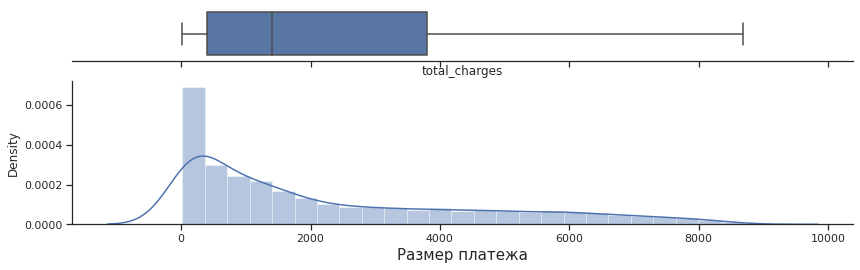

In [27]:
sns.set(style="ticks")
x = df['total_charges']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .8)}, figsize=(14,4))
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlabel("Размер платежа", size = 15)

Описательная статистика, диаграмма "ящик с усами" и гистограмма демонстрирует распределение данных по столбцу total_charges 

- границы от 18 до 9000

- аномалий и выбросов в данных не наблюдается

- максимальное скопление в районе минимального размера платежей, большинство пользователей предпочитают экономить

- данные имеют положительную ассиметрию. Длинный хвост и перекос вправо, вызванные наличием высоких значений. Такие значения смещают среднее значение вправо и оно становится больше медианы

**************

##### Распределение  категориальных признаков

In [28]:
df.groupby('gender')[['monthly_charges', 'total_charges']].agg('mean')

,monthly_charges,total_charges
gender,,
Female,65.216652,2283.190985
Male,64.387546,2283.407861


Мужчины и женщины тратят одинаково

In [29]:
df.groupby('senior_citizen')[['monthly_charges', 'total_charges']].agg('mean')

,monthly_charges,total_charges
senior_citizen,,
0,61.885594,2181.089550
1,79.820359,2810.465193


Ежемесячные платежи пенсионеров выше, видимо они не знают всех способов экономно пользоваться разными видами современной связи.

In [30]:
df.groupby(['partner', 'dependents'])[['monthly_charges', 
            'total_charges']].agg('mean').sort_values(by=['monthly_charges'], ascending = False)

,,monthly_charges,total_charges
partner,dependents,,
Yes,No,74.977737,3332.647157
No,No,62.983735,1610.702439
Yes,Yes,61.070805,2746.914914
No,Yes,52.570891,1349.768802


Самые высокие расходы на связь у супругов без детей, самые экономные - одиночки с детьми. Видимо, такое распределение из-за экономии в пользу детей.

Распределение остальных категорий

In [31]:
list_cat = ['type', 'paper_less_billing',
       'payment_method', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines']

In [32]:
for i in list_cat:
    print(pd.DataFrame(df[i].value_counts()))
    print('---------------------------------')

                type
Month-to-month  3875
Two year        1685
One year        1472
---------------------------------
     paper_less_billing
Yes                4168
No                 2864
---------------------------------
                           payment_method
Electronic check                     2365
Mailed check                         1604
Bank transfer (automatic)            1542
Credit card (automatic)              1521
---------------------------------
        gender
Male      3549
Female    3483
---------------------------------
   senior_citizen
0            5890
1            1142
---------------------------------
     partner
No      3639
Yes     3393
---------------------------------
     dependents
No         4933
Yes        2099
---------------------------------
             internet_service
Fiber optic              3096
DSL                      2416
---------------------------------
     online_security
No              3497
Yes             2015
-----------------------

Распределение категориальных признаков

Тип ежемесячных платежей более 50%, раз в год и раз в 2 года остатки поровну

Больше половины платежей - безналичные

Клиенты женщины и мужчины поровну, из них пенсионеров - 16%, клиенты с супругами и без тоже - 50/50

Большинство потребителей предпочитают "эконом" вариант, остальные клиенты тратят в месяц от 40 до 120.

**************

**Вывод:**

1. 4 датасета объеденены в один по столбцу customerID

        contract.csv — информация о договоре;

        personal.csv — персональные данные клиента;

        internet.csv — информация об интернет-услугах;

        phone.csv — информация об услугах телефонии.

1. В датасете 7033 объект с 0 до 7032 и 20 столбцов 

    'customer_id' - ID клиента, тип данных object
    
    'begin_date' и 'end_date'- дата начала и окончания обслуживания, тип данных object
    
    'payment_type' - типы платежей
        - Month-to-month - ежемесячно (больше половины пользователей)
        - One year - ежегодно (до 25% пользователей)
        - Two year - раз в 2 года (до 25% пользователей)
    
    'paperless_billing' - безбумажное обслуживание
        - да
        - нет
    
    'payment_method' - способ оплаты
        - Electronic check - Электронный чек
        - Mailed check - Отправленный по почте чек
        - Bank transfer (automatic) - Банковский перевод (автоматический)
        - Credit card (automatic) - Кредитная карта (автоматически)
    
    'monthly_charges' - размер ежемесяных платежей,
    
    'total_charges' - общая сумма платежей
    
    'gender' - пол
       
    'senior_citizen' - пенсионер True/False
    
    'partner' - наличие супруга(и) Yes/No

    'dependents' - наличие иждивенцев Yes/No

    'internet_service' - интернет-сервис Fiber optic/DSL

    'online_security' - безопасность в Интернете Yes/No

    'online_backup' - резервное копирование Yes/No

    'device_protection' - защита устройства Yes/No

    'tech_support' - техническая поддержка Yes/No

    'streaming_tv' - потоковое телевидение Yes/No

    'streaming_movies' - потоковое воспроизведение фильмов Yes/No

    'multiple_lines' - наличие возможности ведения параллельных линий во время звонка Yes/No
    

2. Все буквы названий столбцов приведены к строчным и добавлено нижнее подчеркивание для разделения слов.
    

3. Пропуски в присоедененных столбцах (до 20%) заменены на значение 'No' -клиент не пользовался услугой


4. Аномалии, выбросы, дубликаты отсутствуют.


5. Большинство размеров платежей сосредоточено возле минимумов распределения - большинство пользователей предпочитают экономить.


6. 1869 клиентов прекратили пользоваться услугами, 5163- остаются потребителями на 01.02.2020


7. Большинство граждан - не пенсионеры, примерно 84%.
   
   
8. Мужчины и женщины тратят одинаково. 


9. Ежемесячные платежи пенсионеров выше, видимо они не знают всех способов экономно пользоваться разными видами современной связи.


10. Самые высокие расходы на связь у супругов без детей, самые экономные - одиночки с детьми.


11. Основная доля признаков - категориальные


12. Тип ежемесячных платежей более 50%, раз в год и раз в 2 года остатки поровну


13. Больше половины платежей - безналичные


14. Клиенты женщины и мужчины поровну, из них пенсионеров - 16%, клиенты с супругами и без тоже - 50/50


15. Большинство потребителей предпочитают "эконом" вариант, остальные клиенты тратят в месяц от 40 до 120.


16. Отсутствует однозначный целевой признак - удовлетворенность покупателя. Если не удастся такие данные получить, за целевой признак будет принят 'end_date' - дата окончания обслуживания:

 - 'No' - клиент удовлетворен
 
 - наличие даты - клиент не удовлетворен, прекратил пользоваться услугами.
 
 
17. Возможно следует добавить дополнительные категории, например:
 
    - total_time - период времени пользования услугами 
    
    - client_off - клиентн ушел '1', клиент продолжает пользоваться услугами '0'

**************

## Предобработка данных

### Преобразование типов данных

#### Целевой признак

На основании данных 'end_date' добавим признак 'client_off' - клиент ушел(1) или не ушел(0). Признак будет показыват пользуется клиент услугами или нет.

In [33]:
def add_client_off(state):
    if state == 'No':
        return 0
    else:
        return 1

In [34]:
df['client_off'] = df.end_date.apply(add_client_off) 

На основании выводов исследовательского анализа данных для столбцов 

'internet_service', 'online_security', 'online_backup', 'device_protection', 

'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'

заменим пропуски на значение 'No'. Таким образом сохраним все данные без искажения и избавимся от пропущенных данных.

df.fillna('No', inplace=True)

In [35]:
len(df[df['end_date'] == "No"])

5163

In [36]:
len(df[df['end_date'] != "No"])

1869

1869 клиентов прекратили пользоваться услугами, 5163 - остаются потребителями на 01.02.2020

**************

#### Анализ временных данных 

Для корректного анализа и оценки распределения времения пользования клиентов услугами, преобразуем тип данных object столбца begin_date в datetime

In [37]:
df['begin_date'] = pd.to_datetime(df['begin_date'])

Замена значений 'No' на '2020-02-01' - дата выгрузки данных, означает, что клиент продолжил пользоваться услугами

In [38]:
df['end_date'] = df['end_date'].replace('No', '2020-02-01')

In [39]:
df['end_date'] = pd.to_datetime(df['end_date'])

Добавим в датасет признак 'months' - период времени в месяцах, в течении которого клиент пользовался услугами

In [40]:
df['months'] = round((df['end_date'] - df['begin_date']) / np.timedelta64(1, 'M'), 1)

Разместим новый столбец 'months' рядом с датами 

In [41]:
df.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paper_less_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines', 'client_off',
       'months'],
      dtype='object')

In [42]:
df = df.reindex(columns=['customer_id', 'begin_date', 'end_date', 'months', 'type',
       'paper_less_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines', 'client_off'])

Посмотрим на распределение признака 'months'. Но при этом мы имеем 2 вида данных, которые не корректно рассматривать вместе. Это клиенты которые ушли и остались. Могут быть клиенты которые пришли 2 дня назад - мы увидим короткий период, но это не показатель, что клиент не заинтересован.

Для проверки вывода оценим распределение столбца 'months' на исходном датасете df и на датасете без клиентов df_client_off, тех, которые продолжают пользоваться услугами

In [43]:
df['months'].describe()

count    7032.000000
mean       32.438936
std        24.551696
min         1.000000
25%         9.000000
50%        29.000000
75%        55.100000
max        72.000000
Name: months, dtype: float64

Text(0.5, 0, 'Количество месяцев')

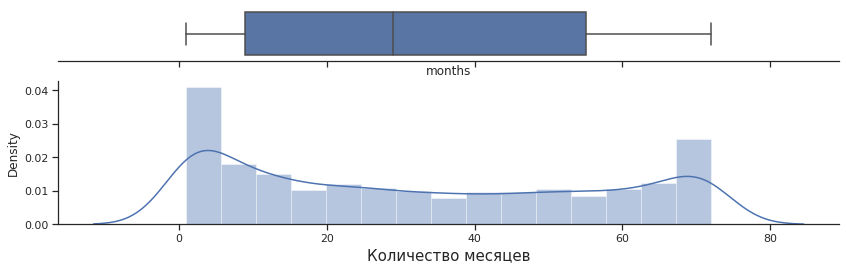

In [44]:
sns.set(style="ticks")
x = df['months']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .8)}, figsize=(14,4))
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlabel("Количество месяцев", size = 15)

Выборка, в которой клиенты ушли

In [45]:
df_client_off = df[df['end_date'] != '2020-02-01']

In [46]:
df_client_off['months'].describe()

count    1869.000000
mean       17.978598
std        19.530460
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: months, dtype: float64

Text(0.5, 0, 'Количество месяцев')

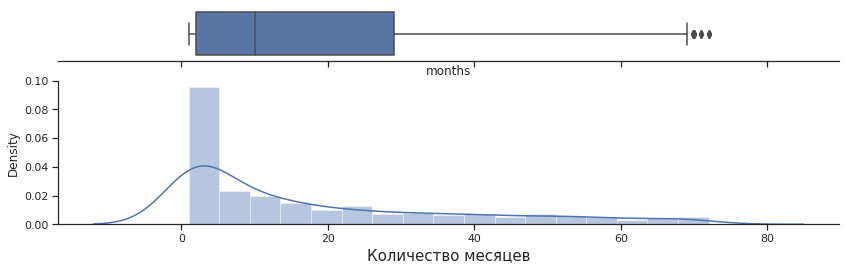

In [47]:
sns.set(style="ticks")
x = df_client_off['months']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .8)}, figsize=(14,4))
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlabel("Количество месяцев", size = 15)

Описательная статистика, диаграмма "ящик с усами" и гистограмма демонстрирует распределение данных по столбцу months выборки данных с ушедшими клиентами 

- границы от 1 до 72

- аномалий и выбросов в данных не наблюдается

- максимальное скопление в районе минимальных сроков пользования, по каким-то причинам клиенты могут уходить в короткий период времени.

**************

#### Кореляция

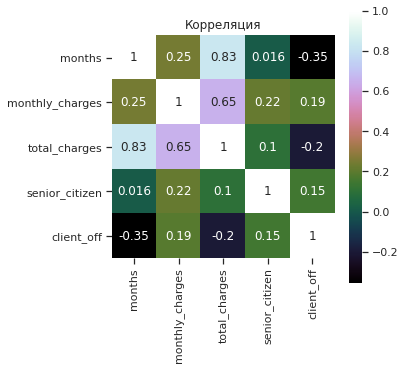

In [48]:
correlation = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Корреляция')
plt.show()

In [49]:
df.corr()

,months,monthly_charges,total_charges,senior_citizen,client_off
months,1.000000,0.246722,0.825810,0.015647,-0.354390
monthly_charges,0.246722,1.000000,0.651065,0.219874,0.192858
total_charges,0.825810,0.651065,1.000000,0.102411,-0.199484
senior_citizen,0.015647,0.219874,0.102411,1.000000,0.150541
client_off,-0.354390,0.192858,-0.199484,0.150541,1.000000


Проверка корреляции показала отсутствие слишком высокой линейной зависимости между признаками, кроме months и total_charges. Здесь прямая линейная зависимость 0.826

**************

### Разбиение на выборки

Удаляем признаки 

'customer_id' не дает информации для обучения

'begin_date', 'end_date', 'months' - имеют неоднозначное влияние на таргет для выборки с ушедшими клиентами и без них.

In [50]:
df = df.drop(['customer_id', 'begin_date', 'end_date', 'months'], axis=1)

**************

#### Кодирование категориальных признаков

С целью исключения категориальных признаков для обучения модели преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE)

In [51]:
df = pd.get_dummies(df, drop_first=True)

In [52]:
df.head()

,monthly_charges,total_charges,senior_citizen,client_off,type_One year,type_Two year,paper_less_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,...,partner_Yes,dependents_Yes,internet_service_Fiber optic,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
0,29.85,29.85,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,53.85,108.15,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,70.70,151.65,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


**************

#### Разделение данных на обучающую 75% и тестовую выборку 25%

In [53]:
train, test = train_test_split(df, test_size=0.25, random_state=42)  

Проверка размера выборок

In [54]:
len(df) - len(train) - len(test)

0

**************

#### Масштабирование признаков

Приведение непрерывных значений признаков к единому масштабу.

<div class="alert alert-info" style="border-color: green; border-radius: 5px">

<p>Для выборки train применяется метод fit и transform совместно - fit_transform, а для выборки test - transform
</p>
</div>

In [55]:
numeric = ['monthly_charges', 'total_charges']

In [56]:
scaler = StandardScaler()

In [57]:
train[numeric] = scaler.fit_transform(train[numeric])

In [58]:
test[numeric] = scaler.transform(test[numeric])

#### Выделение целевого признака

Обучающие признаки

In [59]:
x_train = train.drop(['client_off'] , axis=1)

Обучающие целевые признаки

In [60]:
y_train = train['client_off']

Тестовые признаки

In [61]:
x_test = test.drop(['client_off'] , axis=1)

Тестовый целевой признак

In [62]:
y_test = test['client_off']

**************

## Обучение моделей

### Градиентный бустинг

In [63]:
model_gb = GradientBoostingClassifier(n_estimators=100, max_depth=2, max_features=20, random_state=42)

scores_gb = cross_val_score(model_gb, x_train, y_train, 

                         scoring="roc_auc", cv=15)

scores_gb

array([0.86378443, 0.8627742 , 0.83988949, 0.85578509, 0.85357909,
       0.81261339, 0.8010061 , 0.85137308, 0.85586729, 0.83460965,
       0.83454756, 0.87472059, 0.8512708 , 0.89949499, 0.87091233])

**************

### CatBoost

In [64]:
model_cbc=CatBoostClassifier(iterations=400, depth=1, learning_rate=1, 

loss_function='Logloss', eval_metric ='AUC', verbose=10, random_state = 42)

model_cbc.fit(x_train, y_train,
     eval_set=(x_test, y_test),   
     verbose = False,
     plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**************

### Дерево решений

In [65]:
best_model_dtc = None
best_result_dtc = 0
for depth in range(1, 10):
    
    # обучение модели с заданным количеством деревьев est
    model_dtc = DecisionTreeClassifier(random_state=42, max_depth=depth)
    
    # обучение модели на тренировочной выборке
    model_dtc.fit(x_train, y_train)
    
    # рассчет качества модели на валидационной выборке
    result_dtc = model_dtc.score(x_test, y_test)
    if result_dtc > best_result_dtc:
        
        # сохраняем наилучшую модель
        best_model_dtc =  model_dtc
        
        #  сохраняем наилучшее значение метрики accuracy на валидационных данных
        best_result_dtc = result_dtc 

print("Score наилучшей модели решающее дерево на валидационной выборке:", best_result_dtc)
print(best_model_dtc)

Score наилучшей модели решающее дерево на валидационной выборке: 0.7929465301478953
DecisionTreeClassifier(max_depth=4, random_state=42)


In [66]:
predicted_dtc = model_dtc.predict(x_test)

In [67]:
roc_auc_dtc = round(roc_auc_score(y_test, predicted_dtc), 3)
accuracy_score_dtc = round(accuracy_score(y_test, predicted_dtc), 3)

In [68]:
print ("AUC-ROC = ", roc_auc_score(y_test, predicted_dtc))
print ("accuracy_score = ", accuracy_score(y_test, predicted_dtc))

AUC-ROC =  0.6793046691299967
accuracy_score =  0.7599544937428896


**************

### Случайный лес

In [69]:
model_rfc = RandomForestClassifier(random_state=42)

params = {
    'n_estimators':[x for x in range(40, 60, 1)],
    'min_samples_split':[x for x in range(4, 8, 1)],
    'min_samples_leaf':[x for x in range(5, 9, 1)],    
    'max_depth':[x for x in range(7, 11, 1)]
}

grid = RandomizedSearchCV(model_rfc, params, n_iter=10, random_state=42, cv=15)
grid.fit(x_train, y_train)
print('Лучший результат:')
print(grid.best_params_)
predicted_rfc = grid.predict(x_test)

Лучший результат:
{'n_estimators': 55, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 10}


In [70]:
roc_auc_rfc = round(roc_auc_score(y_test, predicted_rfc), 3)
accuracy_score_lrfc = round(accuracy_score(y_test, predicted_rfc), 3)

In [71]:
print ("AUC-ROC = ", roc_auc_score(y_test, predicted_rfc))
print ("accuracy_score = ", accuracy_score(y_test, predicted_rfc))

AUC-ROC =  0.6857339603627813
accuracy_score =  0.7935153583617748


**************

### Логистическая регрессия

In [72]:
model_lr  = LogisticRegression(random_state=42)

model_lr.fit(x_train, y_train)

predicted_lr = model_lr.predict(x_test)

In [73]:
roc_auc_lr = round(roc_auc_score(y_test, predicted_lr), 3)
accuracy_score_lr = round(accuracy_score(y_test, predicted_lr), 3)

In [74]:
print ("roc_auc = ", roc_auc_lr)
print ("accuracy_score = ", accuracy_score_lr)

roc_auc =  0.694
accuracy_score =  0.786


### Важность признаков

<div class="alert alert-info" style="border-color: green; border-radius: 5px">
   
<p>Построение графика feature_importances для модели CatBoostClassifier.
        
Такой анализ позволяет понять насколько признаки способны спрогнозировать целевую переменную. 
                
- лучшее понимание данных
        
- лучшее понимание модели
        
- возможность уменьшить количество признаков - особенно важно для большого объема данных, тяжелых моделей, в случаях когда нужна высокая скорость обучения/сокращение времени,
        
    </p>
</div>

In [75]:
importances_cbc = model_cbc.feature_importances_
feature_list = list(x_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,
                                'importance': importances_cbc,})

feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results

,feature,importance
0,total_charges,25.674148
1,type_Two year,23.811895
2,internet_service_Fiber optic,19.651871
3,payment_method_Electronic check,8.923034
4,type_One year,7.389263
5,monthly_charges,7.155727
6,streaming_movies_Yes,3.658564
7,streaming_tv_Yes,1.058775
8,senior_citizen,0.710070
9,paper_less_billing_Yes,0.541210


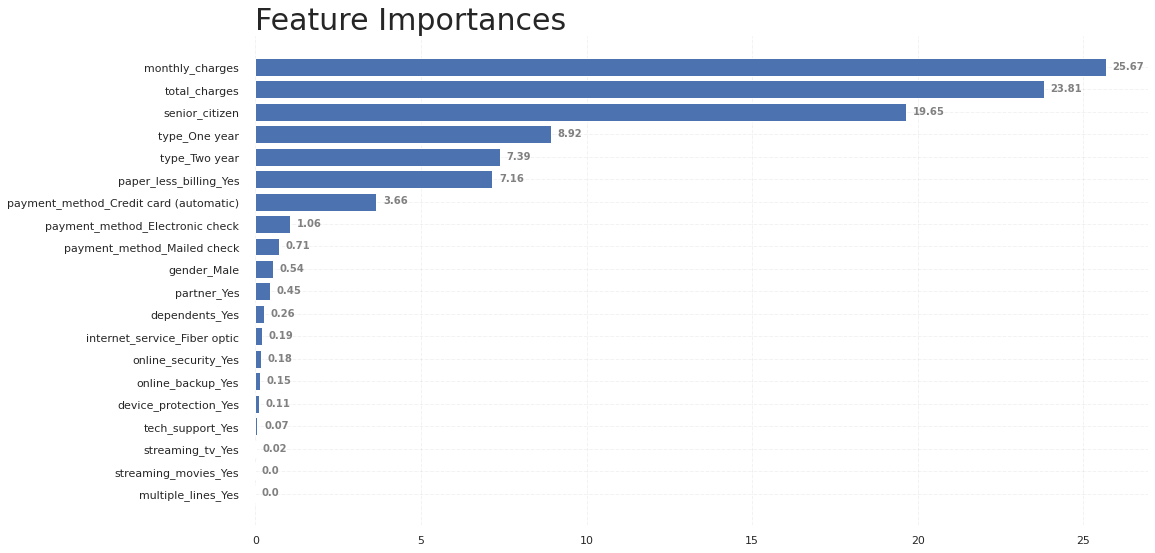

In [77]:
importances_cbc = np.sort(importances_cbc)[::-1]
fig, ax = plt.subplots(figsize=(16, 9))
 
ax.barh(feature_list, importances_cbc)
  
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
  
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
  
# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')

ax.set_title('Feature Importances',
             loc='left', size=30 )

plt.show()

**************

## Вывод

С целью прогнозирования оттока клиентов оператора связи «Ниединогоразрыва.ком», в ходе анализа и обработки персональных данных 

некоторых клиентов, информацию об их тарифах и договорах, проведено обучение 5ти моделей классификации. Модели оценивалось метриками roc_auc и accuracy. Уровень качества моделей позволяет провести прогноз возможного оттока клиентов и скорректировать его, в случае если он добровольный. Сделать это можно предложив промокоды и специальные условия, что поможет повысить лояльность пользователя.

Наивысшее качество оказалось у модели 'Градиентный бустинг' roc_auc = 0.9, далее 

'CatBoost' 0.84

'Дерево решений' 0.704

'Случайный лес' 0.687

'Логистическая регрессия' 0.664

Модели 'Дерево решений', 'Случайный лес' требуют небольшого улучшения. Модели'Градиентный бустинг', 'CatBoost', 'Логистическая регрессия' в разной степени с учетом конкретной ситуации примлемого качества и могут выполнить прогноз оттока.

In [81]:
tab = pd.DataFrame(np.array([
                             [0.9, ''],
                             [0.84, ''],
                             [roc_auc_dtc, accuracy_score_dtc],
                             [roc_auc_rfc, accuracy_score_lrfc],
                             [roc_auc_lr, accuracy_score_lr]
                            ]),
                   columns=['roc_auc', 'accuracy'],
                   index =['Градиентный бустинг','CatBoost','Дерево решений','Случайный лес', 'Логистическая регрессия'])
tab.sort_values(ascending=False, by = 'roc_auc')

,roc_auc,accuracy
Градиентный бустинг,0.9,
CatBoost,0.84,
Логистическая регрессия,0.694,0.786
Случайный лес,0.686,0.794
Дерево решений,0.679,0.76


**************